# D598 Task 3 Shareholder Data Report

#### The program below fulfills all logical requirements and will be invaluable for data analysis and company growth.

The code begins with setting our environment and cleaning our column titles to allow for a higher degree of efficiency when performing future analysis. Additionally, I define a function that will allow me to format the included visualizations for added readability.

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

#imports data to data set and reformats column titles for improved readability
df = pd.read_excel("D598_Data_set.xlsx")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.rename(columns={"total_long-term_debt" : "total_long_term_debt"})


def human_format(x, pos):
    #Formats numbers as K, M, B depending on size.
    if abs(x) >= 1e9:
        return f"{x*1e-9:.1f}B"
    elif abs(x) >= 1e6:
        return f"{x*1e-6:.1f}M"
    elif abs(x) >= 1e3:
        return f"{x*1e-3:.1f}K"
    else:
        return f"{x:.0f}"

df.head(5)

,business_id,business_state,total_long_term_debt,total_equity,debt_to_equity,total_liabilities,total_revenue,profit_margin
0,41872013,Kentucky,16889000.0,18046000.0,0.935886,25986000.0,136753000,0.023663
1,76232013,Iowa,6252000.0,18293621.0,0.341758,14474000.0,34226553,0.265015
2,160992013,Texas,19200000.0,177858000.0,0.107951,72787000.0,384196000,0.130413
3,197452013,Delaware,117592000.0,278773000.0,0.421820,558749000.0,444306000,0.196768
4,241042013,Illinois,4408000.0,52064000.0,0.084665,19898000.0,121541000,0.168305


We then progress to scanning through our data frame for duplicate values.

The code below removes all duplicate values from our data frame. 

Lastly, by utilizing the missingno package we are able to visualize the missing values in each column. By viewing the created bar chart we can see that there are no missing values in our data frame and we can continue with analysis as normal.

<Axes: >

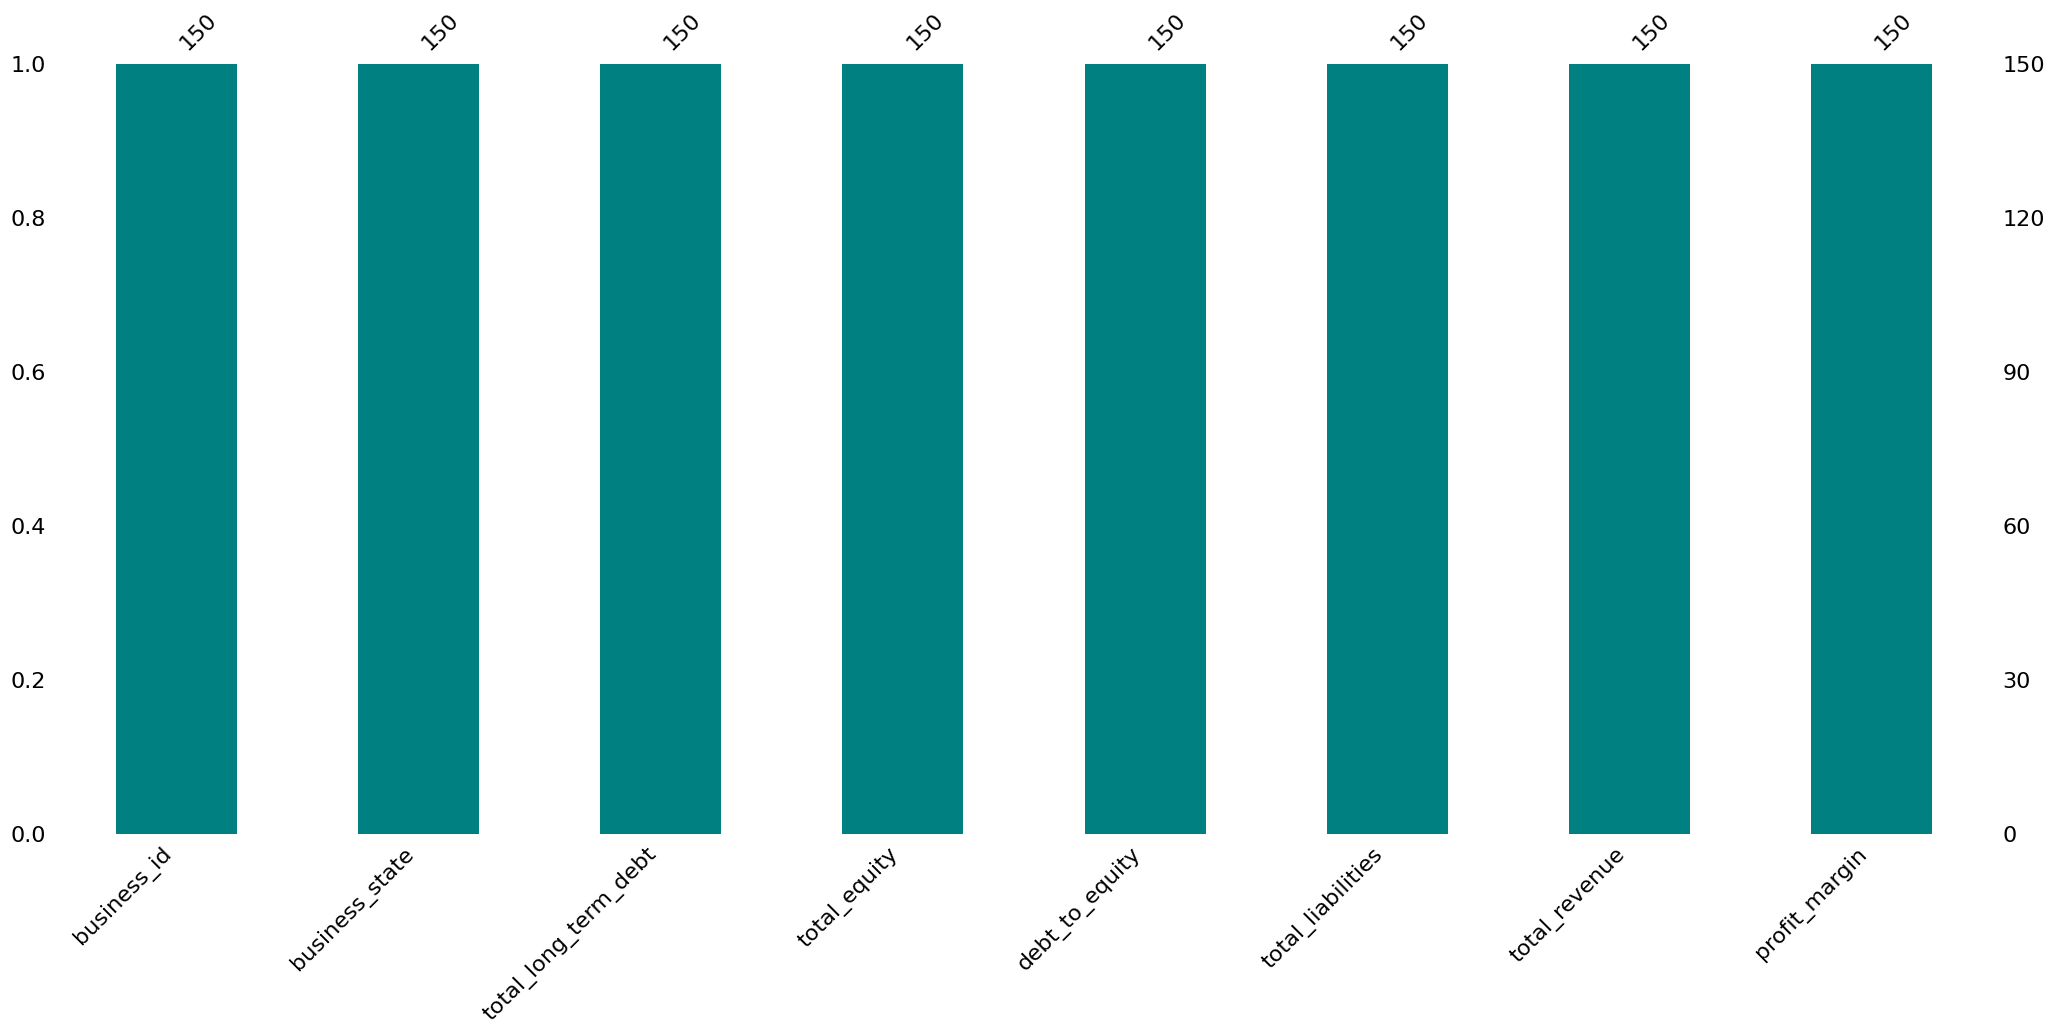

In [ ]:
#removes duplicates
df.drop_duplicates()

#plots percentage of complete data in the 150 rows of our data set
msno.bar(df, color="teal")

Our next block of code creates a data frame for the descriptive statistics of our data set.

In [46]:
stats = ["mean", "median", "min", "max"]

df_statistics = (
    df.groupby("business_state").agg({col: stats for col in df.select_dtypes(include="number").columns}))

df_statistics.columns = [f"{col}_{stat}" for col, stat in df_statistics.columns]

df_statistics = df_statistics.reset_index()

df_statistics.head(5)

,business_state,business_id_mean,business_id_median,business_id_min,business_id_max,total_long_term_debt_mean,total_long_term_debt_median,total_long_term_debt_min,total_long_term_debt_max,total_equity_mean,...,total_liabilities_min,total_liabilities_max,total_revenue_mean,total_revenue_median,total_revenue_min,total_revenue_max,profit_margin_mean,profit_margin_median,profit_margin_min,profit_margin_max
0,Alabama,1.599117e+09,1.599117e+09,422282013,2775952013,6.743890e+08,674389000.0,5314000.0,1.343464e+09,1.441039e+09,...,23698000.0,3.764193e+09,6.968309e+08,696830858.0,137344716,1256317000,0.403732,0.403732,0.297094,0.510371
1,Arizona,9.445082e+09,9.445082e+09,9445082013,9445082013,6.508800e+07,65088000.0,65088000.0,6.508800e+07,5.915300e+07,...,110938000.0,1.109380e+08,2.155800e+08,215580000.0,215580000,215580000,0.206902,0.206902,0.206902,0.206902
2,Arkansas,8.411162e+09,8.411162e+09,7982872013,8839452013,8.960450e+07,89604500.0,70366000.0,1.088430e+08,1.082420e+08,...,213356000.0,2.144080e+08,4.789090e+08,478909000.0,402813000,555005000,0.098319,0.098319,0.073156,0.123482
3,California,1.063053e+10,1.034300e+10,7192742013,14733342013,3.273964e+07,4721500.0,15000.0,3.349970e+08,4.535982e+07,...,2658000.0,7.888110e+08,8.869559e+07,37531500.0,1100539,276869000,0.287947,0.301992,-0.084923,0.505955
4,Colorado,9.966963e+09,1.008177e+10,3194582013,14214612013,8.470025e+07,29327000.0,3375000.0,3.753220e+08,2.007589e+08,...,6787000.0,5.822750e+08,2.486542e+08,202399000.0,7616000,696473000,0.346033,0.314631,0.124017,0.655796


In [ ]:
Al

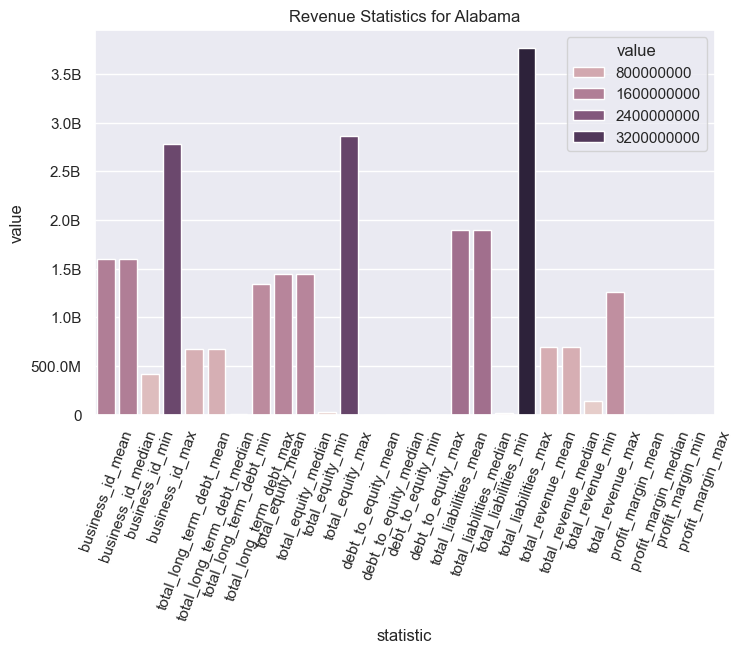

In [ ]:
df_melted = df_statistics.melt(
    id_vars="business_state", 
    value_vars=df_statistics.columns.drop("business_state"),
    var_name="statistic", 
    value_name="value"
)

df_alabama = df_melted[df_melted["business_state"] == "Alabama"]


plt.figure(figsize=(8,5))
sns.barplot(
    data=df_alabama,
    x="statistic",
    y="value",
    hue="value"
)
plt.title("Revenue Statistics for Alabama")
plt.xticks(rotation=80)
plt.xaxis = "Statistics"
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.show()